In [1]:
# !pip install -U imbalanced-learn

In [80]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from pathlib import Path

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix,classification_report
# from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

# Display all of the columns
pd.set_option('display.max_columns', None)

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [81]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
lending_df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
# YOUR CODE HERE!

print(lending_df.shape, '\n\n')

display(lending_df.head())
display(lending_df.tail())

(77536, 8) 




,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [82]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = lending_df['loan_status']
print(f'\ny label: {y.name}\n\n')


# Separate the X variable, the features
# YOUR CODE HERE!
X = lending_df.copy()
X.drop('loan_status', axis=1, inplace=True)
print(f'X Columns:')
list(X.columns)


y label: loan_status


X Columns:


['loan_size',
 'interest_rate',
 'borrower_income',
 'debt_to_income',
 'num_of_accounts',
 'derogatory_marks',
 'total_debt']

In [83]:
# Review the y variable Series
# YOUR CODE HERE!
display(y.head())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [84]:
# Review the X variable DataFrame
# YOUR CODE HERE!
display(X.head())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [105]:
# Check the balance of our target values
# YOUR CODE HERE!
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [106]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(58152, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [107]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

# Fit the model using training data
# YOUR CODE HERE!
classifier = classifier.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [108]:
# Make a prediction using the testing data
# YOUR CODE HERE!
predictions = classifier.predict(X_test)

In [109]:
# Make a prediction using the testing data
# YOUR CODE HERE!

results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Sigmoid Plot

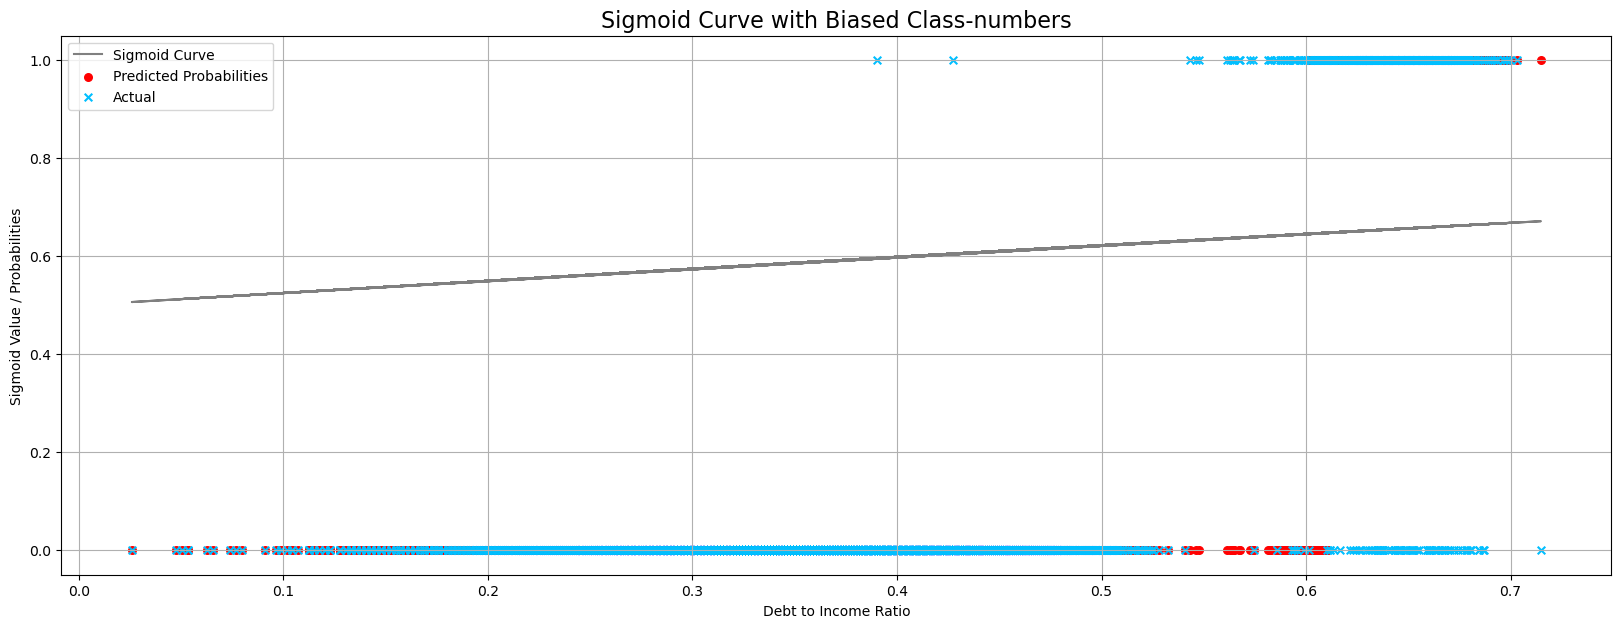

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_values = X_test['debt_to_income'] 
sigmoid_values = sigmoid(X_values)

plt.figure(figsize=(20, 7))

# Plot the sigmoid curve
plt.plot(X_values, sigmoid_values, label="Sigmoid Curve", color = 'gray')

# Overlay the actual and predicted probabilities
plt.scatter(X_values, results['Prediction'], label="Predicted Probabilities", marker='o', color='r', s=30)
plt.scatter(X_values, results['Actual'], label="Actual", marker='x', color='deepskyblue', s=30)

# Add labels and legend
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Sigmoid Value / Probabilities")
plt.title("Sigmoid Curve with Biased Class-numbers", fontsize = 16)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [113]:
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!

bal_acc_score = balanced_accuracy_score(y_test, predictions)
print(f'\nBalanced_Accuracy Score: {bal_acc_score}\n')


Balanced_Accuracy Score: 0.9442676901753825



In [114]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


In [115]:
# Print the classification report for the model
# YOUR CODE HERE!

print("Confusion Matrix")
display(cm_df)
print(f"Balanced_Accuracy Score : {bal_acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18679,80
Actual 1,67,558


Balanced_Accuracy Score : 0.9442676901753825
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

* From the **‘accuracy’** value alone of **99%**, the model appears to fit the data well for healthy loan ('0').  
However, **‘accuracy’** is (TP+TN) / (TP+TN+FP+FN).   From the Confusion Matrix, (TP+TN) >> (FP+FN).  Therefore, (FP+FN) can be neglected yielding a value approaching **100%**.

* The number of outcome ‘1’ is insignificant compared to that of ‘0’ (625 << 18759), resulting in imbalance of outcome numbers. Also, TP << TN.  
The dominance of outcome ‘0’, decreases the outcome ‘1’, by resulting in lower **‘precision’, ‘recall’, ‘f1-score’** values for outcome ‘1’ compared to those of outcome ‘0’.

* **‘precision’, ‘recall’, ‘f1-score’** for outcome ‘1’, have the small value of TP in the numerator, which results in **87%, 89%, 88%** for these values, respectively.

* **Conclusion**: Thus the model does not predict outcome 'high risk loan' as well as it does for 'healthy loan'.   
A more balanced number of occurrences of ‘0’ and ‘1’ could result in values of **‘precision’, ‘recall’, ‘f1-score’** being larger than the present values and also result in higher value of **‘accuracy’**.

* Note: **'balanced_accuracy score'**, is the average of **'recall'** values for both '1'(89%) and '0'(100%) outcomes and results in **~94%**.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [116]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled \
= train_test_split(X_resampled, y_resampled, random_state=1, stratify=y_resampled)


In [117]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
y_resampled.value_counts()

0    75036
1    75036
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [118]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)


# Fit the model using the resampled training data
# YOUR CODE HERE!
classifier = classifier.fit(X_train_resampled, y_train_resampled)


In [119]:
# Make a prediction using the testing data
# YOUR CODE HERE!

predictions = classifier.predict(X_test_resampled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test_resampled}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


### Sigmoid Plot

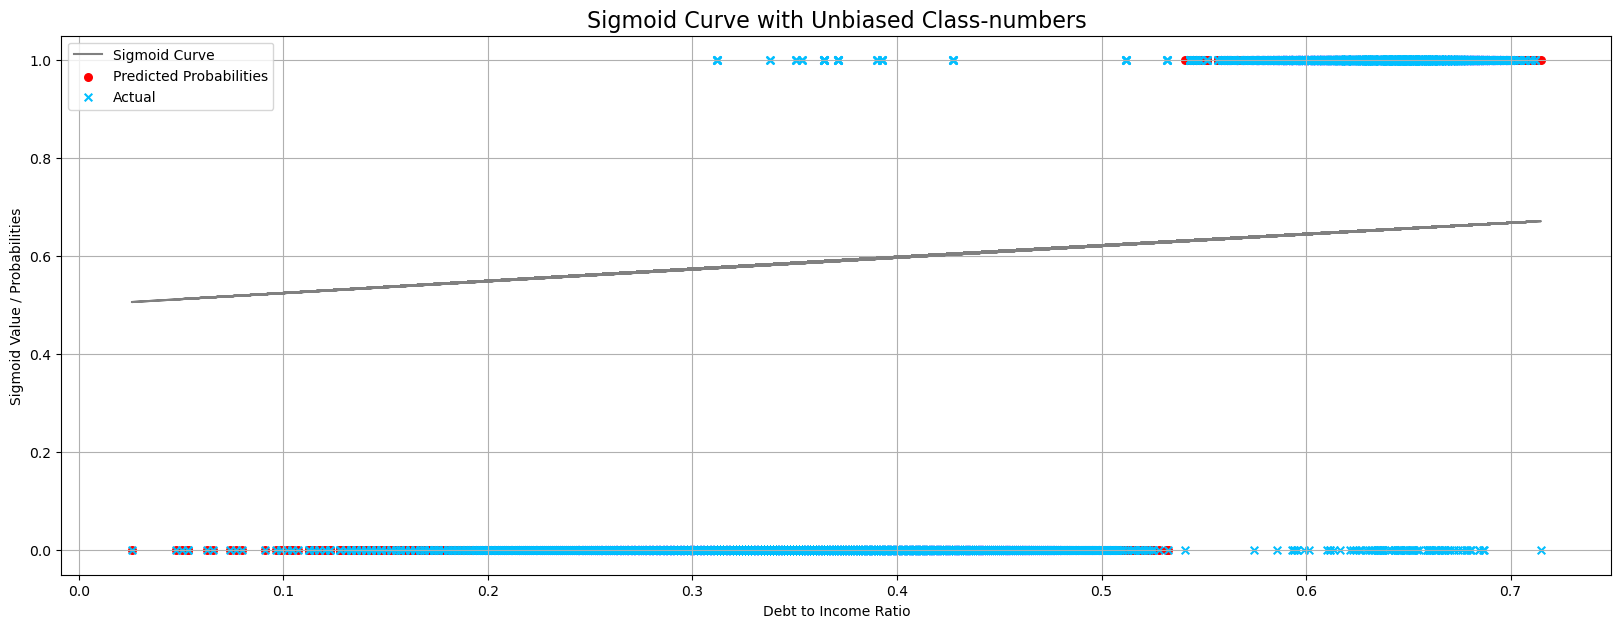

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_values = X_test_resampled['debt_to_income']
sigmoid_values = sigmoid(X_values)

plt.figure(figsize=(20, 7))

# Plot the sigmoid curve
plt.plot(X_values, sigmoid_values, label="Sigmoid Curve", color = 'gray')

# Overlay the actual and predicted probabilities
plt.scatter(X_values, results['Prediction'], label="Predicted Probabilities", marker='o', color='red', s=30)
plt.scatter(X_values, results['Actual'], label="Actual", marker='x', color='deepskyblue', s=30)

# Add labels and legend
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Sigmoid Value / Probabilities")
plt.title("Sigmoid Curve with Unbiased Class-numbers", fontsize = 16)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [121]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
bal_acc_score = balanced_accuracy_score(y_test_resampled, predictions)

In [122]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
cm = confusion_matrix(y_test_resampled, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [123]:
# Print the classification report for the model
# YOUR CODE HERE!

print("Confusion Matrix")
display(cm_df)
print(f"Balanced_Accuracy Score : {bal_acc_score}")
print("Classification Report")
print(classification_report(y_test_resampled, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18668,91
Actual 1,114,18645


Balanced_Accuracy Score : 0.9945359560744176
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       1.00      0.99      0.99     18759

    accuracy                           0.99     37518
   macro avg       0.99      0.99      0.99     37518
weighted avg       0.99      0.99      0.99     37518



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

* Using **RandomOverSampler**, the severe imbalance in  number of outcomes ‘1’ and ‘0’ , is removed, resulting in equal number of outcomes for each class (18759 = 18759). Now, TP ~ TN.

* The **‘accuracy’** value remains at **99%**.  
This is because **‘accuracy’** = (TP+TN) / (TP+TN+FP+FN).   From the revised Confusion Matrix, (TP+TN) >> (FP+FN).  As before, (FP+FN) can be neglected yielding a value approaching **100%**.

* The number of outcome ‘1’ is exactly equal to that of ‘0’ (18759 = 18759).   
**‘precision’, ‘recall’, ‘f1-score’** for outcome ‘1’, have the large value of TP in the numerator, which results in **100%, 99%, 99%** for these values, respectively.

* **'balanced_accuracy score'**, the average of **'recall'** values for both '1'(99%) and '0'(100%) outcomes, improved from **~94.4%** to **~99.5%**.

* **Conclusion**: The model now predicts for outcome **'high risk loan'** just as well as it does for **'healthy loan'**.   
A balanced number of occurrences of ‘0’ and ‘1’ results in values of **‘precision’, ‘recall’, ‘f1-score’** for both outcomes '1' and '0' as apploaching 100%.

